In [5]:
%load_ext autoreload
%autoreload 2

In [2]:
from nanofilm.ndimage import imread
import numpy as np
from clustering_elliMapStack_fromFolder import lambdaVarEllimaps as lve

In [3]:
PATH = 'F:\example_elli-maps_forTFM\Garching-wednesday-hBN__smallset-withNaNs-goodforquicktest'

In [4]:
xxx = lve(PATH)

In [5]:
xxx.dim3

22

In [6]:
n_wl = int(xxx.dim3/2)
n_wl

11

In [7]:
np.arange(n_wl)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [8]:
[x for x in np.arange(n_wl) if x%2 == 0]

[0, 2, 4, 6, 8, 10]

In [9]:
[x for x in np.arange(n_wl) if x%2 != 0]

[1, 3, 5, 7, 9]

In [10]:
deltaids = [x for x in np.arange(n_wl*2) if x%2 == 0]
psiids = [x + 1 for x in deltaids] 

deltaids, psiids

([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21])

In [11]:
didx = [x for x in np.arange(n_wl*2) if x%2 == 0]
pidx = [x+1 for x in np.arange(n_wl*2) if x%2 == 0]

didx, pidx

([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21])

In [12]:
len(didx)

11

In [13]:
len(np.arange(n_wl))

11

In [14]:
ss = list(map(lambda l1,l2: (l1,l2), didx, pidx))
ss

[(0, 1),
 (2, 3),
 (4, 5),
 (6, 7),
 (8, 9),
 (10, 11),
 (12, 13),
 (14, 15),
 (16, 17),
 (18, 19),
 (20, 21)]

In [15]:
didx[0]

0

In [16]:
d, p = ss[0]
p

1

In [17]:
nwl = np.arange(int(xxx.dim3/2))

didx = [x for x in nwl*2 if x%2 == 0]
pidx = [x+1 for x in nwl*2 if x%2 == 0]

In [18]:
import random

In [19]:
iselect = random.choice(nwl)

di, pi = didx[iselect], pidx[iselect]
iselect, di, pi

(7, 14, 15)

In [20]:
len(didx)

11

In [21]:
tenC = xxx.clusterize(10)

In [22]:
tenC.shape

(344, 260, 22)

In [23]:
np.unique(tenC)

array([ 12.970598,  16.16466 ,  17.99382 ,  18.225153,  18.257519,
        18.369186,  20.117088,  20.835968,  22.360424,  23.247059,
        24.332043,  24.491238,  24.58895 ,  25.637972,  26.498741,
        26.90634 ,  26.995304,  27.107443,  27.837242,  28.236853,
        28.351738,  28.508623,  28.5409  ,  28.66706 ,  28.68438 ,
        28.734821,  28.823633,  28.836527,  28.850904,  28.85858 ,
        28.892666,  29.040136,  29.042767,  29.202076,  29.339832,
        29.345942,  29.402454,  29.658567,  29.727167,  30.008484,
        30.14032 ,  30.155785,  30.169632,  30.29779 ,  30.342823,
        30.417183,  30.575287,  30.62275 ,  30.735218,  30.750778,
        30.784256,  30.803133,  30.819841,  30.860703,  30.930489,
        30.956432,  31.003202,  31.01742 ,  31.039753,  31.163555,
        31.227783,  31.30248 ,  31.478926,  31.501469,  31.547804,
        31.687391,  31.732027,  31.753342,  31.783144,  31.821896,
        31.871418,  32.001892,  32.009674,  32.099777,  32.148

In [24]:
labels_firstmap = np.unique(np.dsplit(tenC, tenC.shape[2])[0])
labels_firstmap

array([141.45116, 156.30637, 160.03696, 188.97266, 192.3648 , 197.62808,
       198.56108, 215.2008 , 215.4266 , 218.67676], dtype=float32)

In [29]:
import matplotlib.pyplot as plt

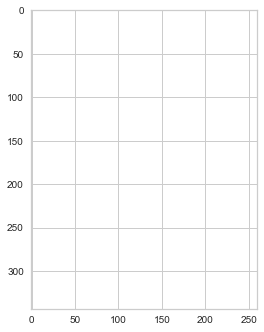

In [35]:
empty = np.zeros_like(np.dsplit(tenC, tenC.shape[2])[0])
plt.imshow(empty)

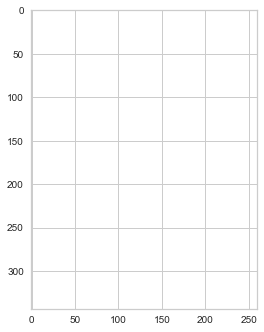

In [38]:
selected = lve.pickonefromstack(tenC)
empt2 = np.zeros_like(selected)
plt.imshow(empt2)

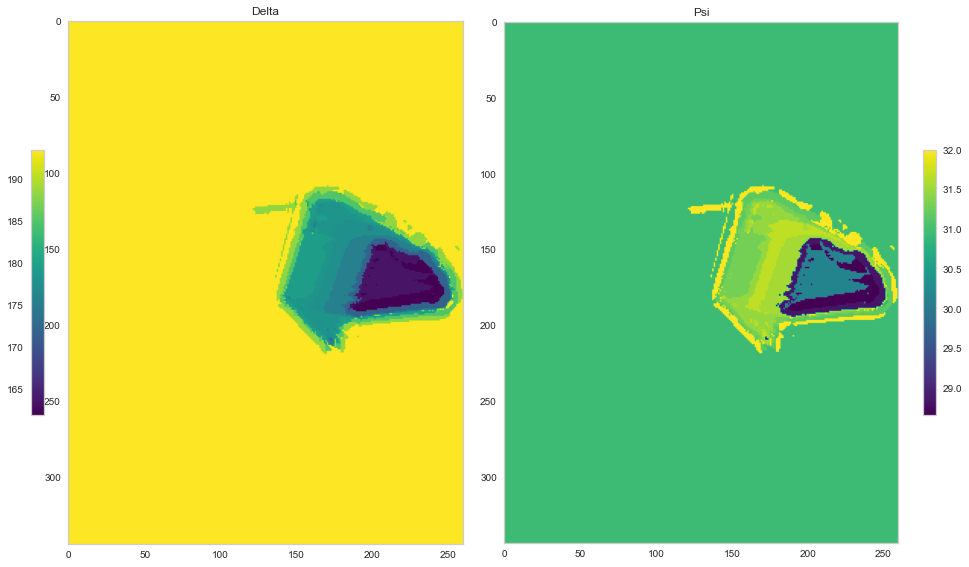

In [26]:
xxx.plotSegmentedDeltaPsi(10)

(None, None)

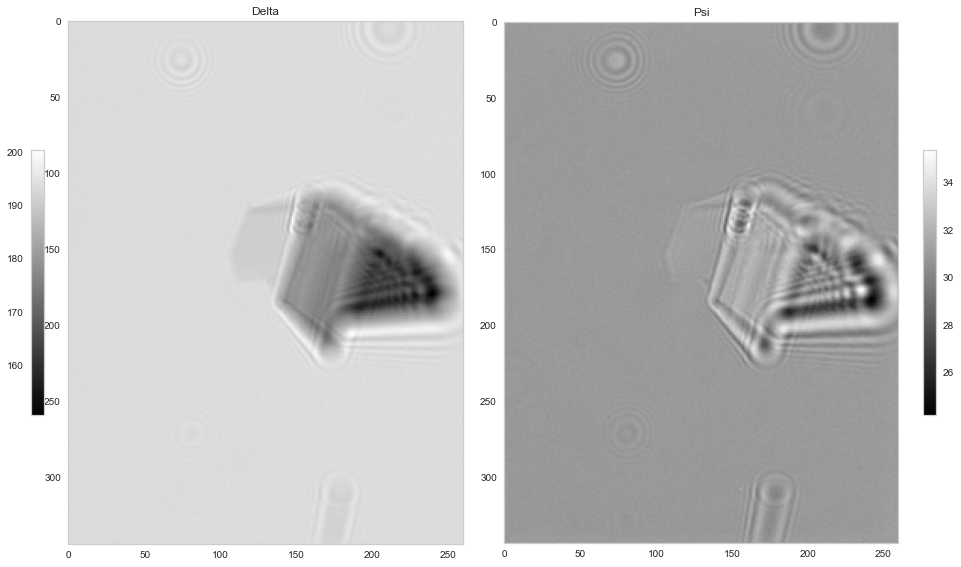

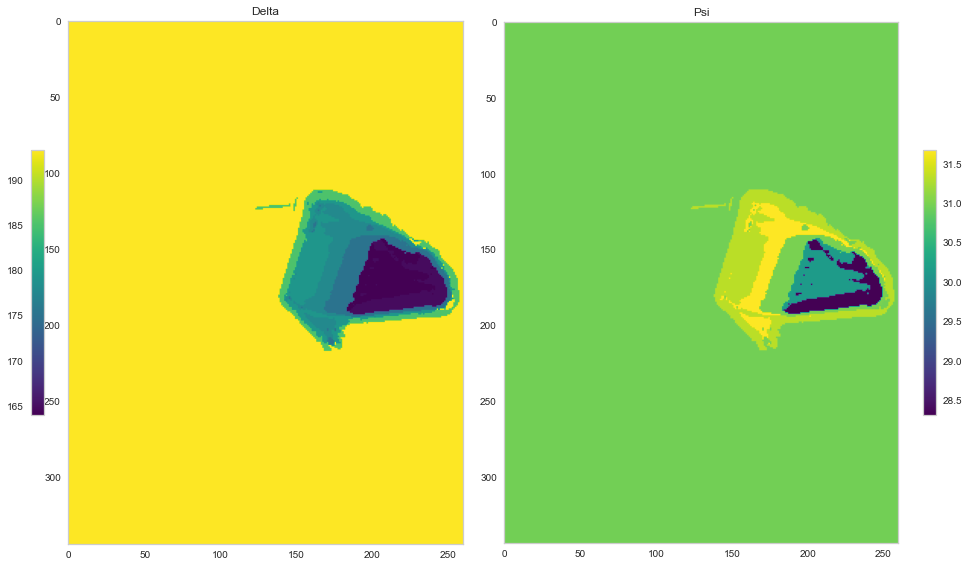

In [39]:
xxx.clusterize(7)
xxx.plotDeltaPsi(10), xxx.plotSegmentedDeltaPsi(10)

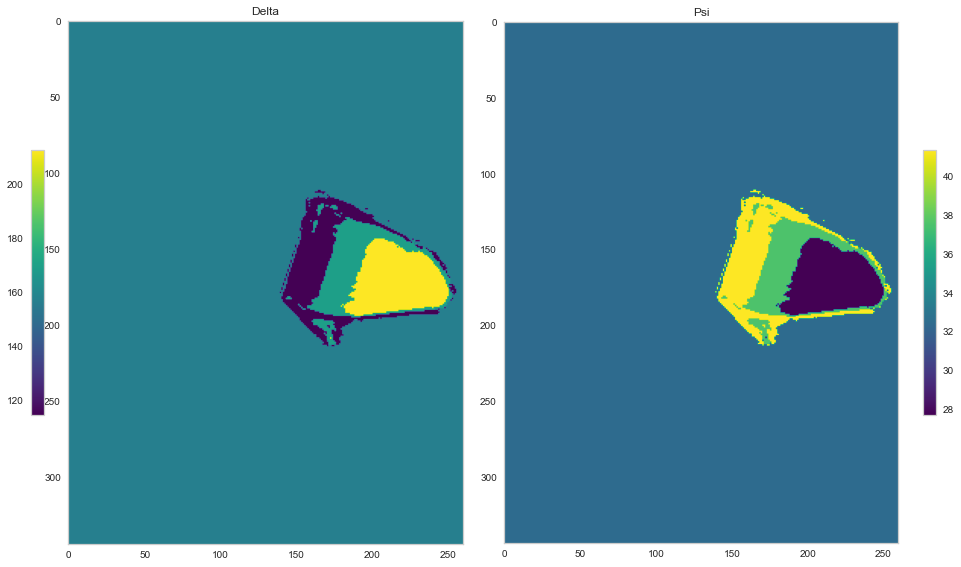

In [55]:
xxx.clusterize(4)
xxx.plotSegmentedDeltaPsi(3)

In [46]:
from skimage.segmentation import mark_boundaries, find_boundaries

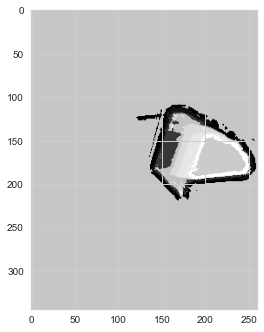

In [52]:
im = np.dsplit(tenC, tenC.shape[2])[3]
plt.imshow(im)

In [56]:
from skimage.feature import canny

In [59]:
im.shape

(344, 260, 1)

In [61]:
image = im.reshape(im.shape[0], im.shape[1])

In [62]:
edged = canny(image)

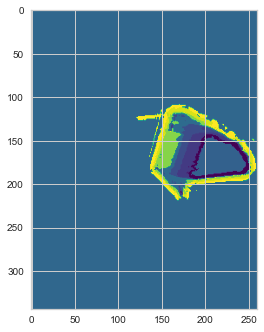

In [70]:
plt.imshow(edged),
plt.imshow(image, cmap='viridis')

In [65]:
edged.shape

(344, 260)

In [66]:
edged

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# Trying new separated delta psi class

In [12]:
from clustering_separated_delta_psi import lambdaVarEllimaps as seplve

In [17]:
import pandas as pd

In [13]:
PATH = 'F:\example_elli-maps_forTFM\Garching-wednesday-hBN__smallset-withNaNs-goodforquicktest'

In [26]:
xxx.getdatFile()

In [14]:
ppp = seplve(PATH)

TypeError: 'list' object cannot be interpreted as an integer

In [11]:
ppp.WLarray

NameError: name 'ppp' is not defined

In [7]:
deltaarray = ppp.DeltaFilearray
print(deltaarray)

AttributeError: 'lambdaVarEllimaps' object has no attribute 'DeltaFilearray'

In [16]:
psiarray = ppp.PsiFilearray

NameError: name 'ppp' is not defined

In [33]:
ppp.datFile

'F:\\example_elli-maps_forTFM\\Garching-wednesday-hBN__smallset-withNaNs-goodforquicktest\\hBN_20160406142746988.ds.dat'

In [6]:
import pandas as pd

In [18]:
dsfile = PATH + '\hBN_20160406142746988.ds.dat'

In [19]:
df = pd.read_csv(dsfile, sep='\t', skiprows=[1])

In [20]:
df

,#lambda,bandwidth,AOI,zone,time,X_pos,Y_pos,Theta_pos,Delta,Psi
0,550.0,NaN,50.0,0,0.185,2.474,2.558,NaN,hBN_20160406142746988_001.png,hBN_20160406142746988_002.png
1,575.0,NaN,50.0,0,0.185,2.474,2.558,NaN,hBN_20160406142746988_003.png,hBN_20160406142746988_004.png
2,600.0,NaN,50.0,0,0.185,2.474,2.558,NaN,hBN_20160406142746988_005.png,hBN_20160406142746988_006.png
3,625.0,NaN,50.0,0,0.185,2.474,2.558,NaN,hBN_20160406142746988_007.png,hBN_20160406142746988_008.png
4,650.0,NaN,50.0,0,0.185,2.474,2.558,NaN,hBN_20160406142746988_009.png,hBN_20160406142746988_010.png
5,675.0,NaN,50.0,0,0.185,2.474,2.558,NaN,hBN_20160406142746988_011.png,hBN_20160406142746988_012.png
6,700.0,NaN,50.0,0,0.185,2.474,2.558,NaN,hBN_20160406142746988_013.png,hBN_20160406142746988_014.png
7,725.0,NaN,50.0,0,0.185,2.474,2.558,NaN,hBN_20160406142746988_015.png,hBN_20160406142746988_016.png
8,750.0,NaN,50.0,0,0.185,2.474,2.558,NaN,hBN_20160406142746988_017.png,hBN_20160406142746988_018.png
9,775.0,NaN,50.0,0,0.185,2.474,2.558,NaN,hBN_20160406142746988_019.png,hBN_20160406142746988_020.png


In [23]:
a = df.iloc[:,[0]]
a

,#lambda
0,550.0
1,575.0
2,600.0
3,625.0
4,650.0
5,675.0
6,700.0
7,725.0
8,750.0
9,775.0


In [25]:
s = [elem for elem in a]
s

['#lambda']

In [26]:
a.values

array([[550.],
       [575.],
       [600.],
       [625.],
       [650.],
       [675.],
       [700.],
       [725.],
       [750.],
       [775.],
       [800.]])

In [29]:
b = df['#lambda'].to_numpy()
b

array([550., 575., 600., 625., 650., 675., 700., 725., 750., 775., 800.])